In [1]:
#from sklearn import svm, grid_search, datasets
#from spark_sklearn import GridSearchCV 
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import make_scorer
#from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)##fix notacion cientifica 
import seaborn as sns
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split ##new 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline 

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
file = "hot_data.csv" 
df = pd.read_csv(file , sep=';' ,  encoding='utf-8' , decimal='.') #decimal para leer las comas

In [3]:
## es mas eficiente trabajar con un solo tipo de datos 
df = df.astype('float32')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293667 entries, 0 to 293666
Data columns (total 52 columns):
117 - VALPARAÍSO                      293667 non-null float32
1 - BT-2 PACTADO                      293667 non-null float32
124 - AT - PLD PRECIO FIJO            293667 non-null float32
22 - BT-2                             293667 non-null float32
55 - BT-1A                            293667 non-null float32
57 - BT-3                             293667 non-null float32
58 - BT-4.1                           293667 non-null float32
60 - BT-4.3                           293667 non-null float32
61 - AT-2                             293667 non-null float32
62 - AT-3                             293667 non-null float32
65 - AT-4.3                           293667 non-null float32
72 - BOMBEROS BT-1A                   293667 non-null float32
79 - EMPLEADOS ACTIVOS Y JUBILADOS    293667 non-null float32
83 - EMPLEADOS PASIVOS                293667 non-null float32
1 - RESIDENCIAL      

In [5]:
data = df.as_matrix()
data = np.matrix(data)

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:



data 

matrix([[    1. ,     1. ,     0. , ...,    16.5,    11.8,  3215. ],
        [    1. ,     1. ,     0. , ...,    15.8,    10.6,  3197. ],
        [    1. ,     1. ,     0. , ...,    13.4,     9.3,  3658. ],
        ...,
        [    1. ,     0. ,     0. , ...,    15.7,    11.2, 11536.9],
        [    1. ,     0. ,     0. , ...,    16.4,    12.8, 11414.8],
        [    1. ,     0. ,     0. , ...,    16.4,    12.2, 10716.8]],
       dtype=float32)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

np.random.seed(123)
m_train    = np.random.rand(len(data)) < 0.5
data_train = data[m_train,]
data_test  = data[~m_train,]


# CLASE
#---------------------------------------------------------------------------------------------
clase_train = data_train[:,-1]
clase_train = clase_train.A1 #convierte de matriz a vector 
clase_test  = data_test[:,-1]
clase_test  = clase_test.A1 #convierte de matriz a vector 



 

In [13]:
clase_train

array([ 3197. ,  3658. ,  4644. , ..., 10444.8, 11536.9, 10716.8],
      dtype=float32)

In [15]:
data_train[:,:-1]

matrix([[ 1. ,  1. ,  0. , ..., 22.8, 15.8, 10.6],
        [ 1. ,  1. ,  0. , ..., 19.6, 13.4,  9.3],
        [ 1. ,  1. ,  0. , ..., 14.9, 10.2,  7.6],
        ...,
        [ 1. ,  0. ,  0. , ..., 19. , 12.6,  9.1],
        [ 1. ,  0. ,  0. , ..., 23.5, 15.7, 11.2],
        [ 1. ,  0. ,  0. , ..., 22.3, 16.4, 12.2]], dtype=float32)

In [ ]:

# MODELO
#---------------------------------------------------------------------------------------------
modelo_lr = LogisticRegression()

from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(clase_train)

modelo_lr.fit(X=data_train[:,:-1],y=training_scores_encoded)


# PREDICCION
#---------------------------------------------------------------------------------------------
predicion = modelo_lr.predict(data_test[:,:-1])


## Error medio de los modelos 

Con el error absoluto medio no indica que tan lejos de la prediciones estamos en este caso se analizan 6 modelos para comparar sus errores.

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0,0.5,'Error Absoluto Medio')

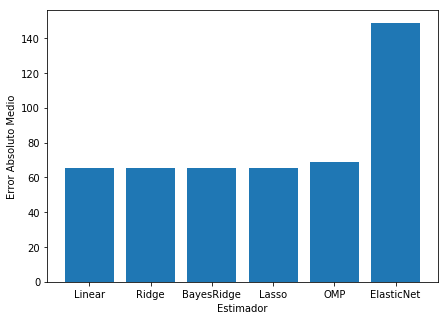

In [7]:
rs = 1
# lista de modelos 
ests = [linear_model.LinearRegression(),
        linear_model.Ridge(),
        linear_model.Lasso(),
        linear_model.ElasticNet(),
        linear_model.BayesianRidge(),
        linear_model.OrthogonalMatchingPursuit()
       ]
#Etiquetas de los modelos 
ests_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
errvals = np.array([])

## same thing
#X = df.drop(['CONSUMO'], axis=1).as_matrix()
#y = df[['CONSUMO']].as_matrix()

X = df.drop(['CONSUMO'], axis=1).values.reshape(-1,1)
y = df[['CONSUMO']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split( X , df[['CONSUMO']] , test_size=0.05, random_state=20)

X_train, X_test, y_train, y_test = train_test_split( df.drop(['CONSUMO'], axis=1) , df[['CONSUMO']] , test_size=0.05, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimador')
plt.ylabel('Error Absoluto Medio') 

## Regresión Lineal 


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()

In [6]:
 X_train.shape

(278983, 51)

In [7]:
y_train.shape

(278983, 1)

In [8]:
lm.fit(X_train , y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
valores_estimados = lm.predict(X_test)

In [10]:
## upsi
##y_test = y_test[['CONSUMO']]

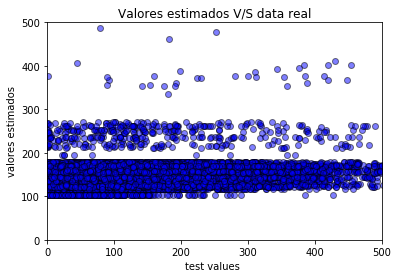

In [11]:
#Visualizamos nuevamente los datos 
plt.scatter(y_test , valores_estimados  , c='b' , edgecolors=(0,0,0) , alpha = 0.5)
plt.title('Valores estimados V/S data real')
plt.xlabel('test values ')
plt.ylabel('valores estimados')
plt.xlim(0,500)
plt.ylim(0,500)
plt.show()

In [12]:
valores_estimados.shape

(14684, 1)

In [13]:
plot_values = pd.DataFrame()

plot_values=y_test
plot_values['y_pred'] =valores_estimados

plot_values.head()


,CONSUMO,y_pred
269147,120.5,169.460938
153796,174.9,176.570312
290099,152.5,152.742188
64446,46.2,159.078125
107489,433.4,170.117188


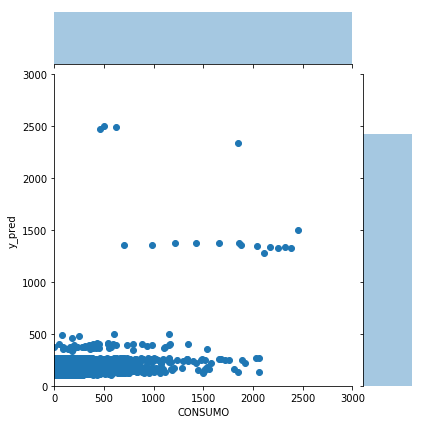

In [14]:
#Visualizamos nuevamente los datos 
sns.jointplot(data = plot_values, x = 'CONSUMO',y ='y_pred' ,ylim=(0,3000),xlim=(0,3000) )   

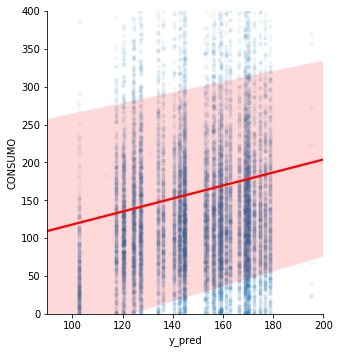

In [18]:
# Regresión lineal simple 
g = sns.lmplot(data = plot_values, x = 'y_pred', y ='CONSUMO' ,  line_kws={'color': 'red'} , scatter_kws={"s": 10 , 'alpha':0.05})
g.set(ylim=(0, 400))
g.set(xlim=(90,200))

## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier 

In [108]:
forest = RandomForestClassifier(n_estimators=100, random_state=42 , max_depth = 3)
# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


forest.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ValueError: Unknown label type: 'continuous'

## KNN 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#50*

X_train.shape

(278983, 51)

In [29]:
X_train.shape

(278983, 51)

In [30]:
X_test.shape

(14684, 51)

In [34]:
##Eliminiando el error de continous de la variable  y 
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1170  533 2163 ... 3116 2553 1271]
continuous
multiclass
multiclass


C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(293667, 52)

## Red

In [2]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout , Activation , Flatten
## or witn tensorflow
from tensorflow.python.keras import optimizers
# permite crear redes neuronales secuenciales 
#from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
#from keras.layers import Flatten,  MaxPooling2D, Conv2D 

from keras.callbacks import TensorBoard
#https://mc.ai/introduccion-a-las-redes-neuronales-con-python-utilizando-keras/

Using TensorFlow backend.


In [3]:
file = "hot_data.csv" 
df = pd.read_csv(file , sep=';' ,  encoding='utf-8' , decimal='.') #decimal para leer las comas

In [4]:
#df.info()
array = df.values
array.shape 
X = array[:,0:51] 
Y = array[:,51]

In [11]:
model = Sequential()
model.add(Dense(51, input_dim=51,   activation='relu'))
model.add(Dense(64,   activation='relu'))
#model.add(Dense(4,   activation='relu')) #74%
model.add(Dense(1,  activation='relu'))

In [12]:
# learning rate ,menor es mejor
lr = 0.0004

In [17]:
#model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=lr), metrics=['accuracy']) ##70~74
model.compile(loss='mean_squared_error', optimizer="adam", metrics=['accuracy']) # 80

In [18]:
#tensor_board = TensorBoard('C:/Users/cvargasa/Documents/IMG/BIG DATA/CURSOS/Jupyter-Notebook/Modelos/Consumo/logs/consumo')
tensor_board = TensorBoard('./logs/consumo')

In [19]:
tensor_board.log_dir

'./logs/consumo'

In [20]:
model.fit(X, Y, epochs=500, batch_size=30)

Epoch 1/500
293667/293667 [==============================] - 11s 37us/step - loss: 14247148.1927 - acc: 3.2009e-04
Epoch 2/500
293667/293667 [==============================] - 11s 36us/step - loss: 12514469.8184 - acc: 4.4949e-04
Epoch 3/500
293667/293667 [==============================] - 11s 36us/step - loss: 11334301.1373 - acc: 3.8479e-04
Epoch 4/500
293667/293667 [==============================] - 11s 37us/step - loss: 10214339.9795 - acc: 3.8138e-04
Epoch 5/500
293667/293667 [==============================] - 11s 37us/step - loss: 9218677.6322 - acc: 4.0863e-04
Epoch 6/500
293667/293667 [==============================] - 11s 36us/step - loss: 8225875.2312 - acc: 1.7367e-04
Epoch 7/500
293667/293667 [==============================] - 11s 37us/step - loss: 6918602.2027 - acc: 2.7242e-05
Epoch 8/500
293667/293667 [==============================] - 11s 37us/step - loss: 5877767.2142 - acc: 0.0000e+00
Epoch 9/500
293667/293667 [==============================] - 11s 38us/step - loss: 4

293667/293667 [==============================] - 10s 35us/step - loss: 2664064.4543 - acc: 4.3927e-04
Epoch 142/500
293667/293667 [==============================] - 10s 35us/step - loss: 2633587.0997 - acc: 3.9160e-04 0s - loss: 2717892.3359 - ac
Epoch 143/500
293667/293667 [==============================] - 10s 35us/step - loss: 2596683.5286 - acc: 4.6651e-04
Epoch 144/500
293667/293667 [==============================] - 10s 36us/step - loss: 2641282.5830 - acc: 4.0863e-04
Epoch 145/500
293667/293667 [==============================] - 10s 35us/step - loss: 2662925.3035 - acc: 3.5414e-04
Epoch 146/500
293667/293667 [==============================] - 10s 35us/step - loss: 2632760.3258 - acc: 4.0863e-04
Epoch 147/500
293667/293667 [==============================] - 11s 36us/step - loss: 2660510.6961 - acc: 4.3246e-04
Epoch 148/500
293667/293667 [==============================] - 11s 36us/step - loss: 2633827.8389 - acc: 4.5289e-04 5s
Epoch 149/500
293667/293667 [=========================

293667/293667 [==============================] - 11s 37us/step - loss: 2610589.9293 - acc: 4.0863e-04
Epoch 282/500
293667/293667 [==============================] - 11s 37us/step - loss: 2608912.2083 - acc: 3.8479e-04
Epoch 283/500
293667/293667 [==============================] - 11s 37us/step - loss: 2637233.6633 - acc: 4.0182e-04
Epoch 284/500
293667/293667 [==============================] - 11s 37us/step - loss: 2639213.7907 - acc: 4.1203e-04
Epoch 285/500
293667/293667 [==============================] - 11s 37us/step - loss: 2629260.8874 - acc: 3.7457e-04
Epoch 286/500
293667/293667 [==============================] - 11s 36us/step - loss: 2614872.8958 - acc: 4.3246e-04
Epoch 287/500
293667/293667 [==============================] - 11s 36us/step - loss: 2584520.5691 - acc: 4.4608e-04
Epoch 288/500
293667/293667 [==============================] - 11s 36us/step - loss: 2627070.3147 - acc: 4.1884e-04
Epoch 289/500
293667/293667 [==============================] - 11s 37us/step - loss: 2

293667/293667 [==============================] - 10s 35us/step - loss: 2614211.4067 - acc: 4.4608e-04
Epoch 422/500
293667/293667 [==============================] - 10s 35us/step - loss: 2616498.8492 - acc: 4.1884e-04
Epoch 423/500
293667/293667 [==============================] - 10s 34us/step - loss: 2611826.5012 - acc: 3.5414e-04
Epoch 424/500
293667/293667 [==============================] - 10s 35us/step - loss: 2612771.4394 - acc: 3.5074e-04
Epoch 425/500
293667/293667 [==============================] - 10s 34us/step - loss: 2622257.4735 - acc: 4.3587e-04
Epoch 426/500
293667/293667 [==============================] - 10s 35us/step - loss: 2602122.0326 - acc: 4.1884e-04
Epoch 427/500
293667/293667 [==============================] - 10s 35us/step - loss: 2590940.2362 - acc: 3.6095e-04
Epoch 428/500
293667/293667 [==============================] - 10s 35us/step - loss: 2605655.4270 - acc: 3.5755e-04
Epoch 429/500
293667/293667 [==============================] - 11s 36us/step - loss: 2

In [21]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

293667/293667 [==============================] - 6s 20us/step
acc: 0.05%


In [35]:
# Crearemos una lista con valores para K y un vector para almacenar su score 
k_rango = list(range(1, 20))
scores = []
for k in k_rango:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , training_scores_encoded) 
    scores.append(knn.score(X_test ,y_test) * 100)
    
    
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_rango, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Prueba de precision')

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets